In [1]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Age'>

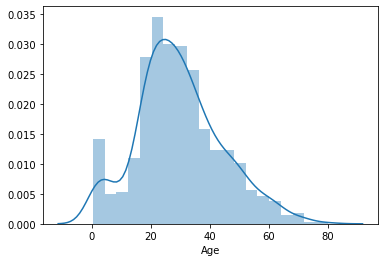

In [6]:
sns.distplot(df['Age'].dropna())# after dropping the null value distrution plot is normal curve

<AxesSubplot:xlabel='Age'>

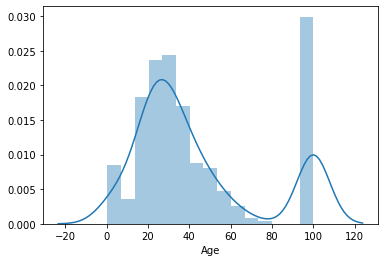

In [7]:
sns.distplot(df['Age'].fillna(100))# if we add 100 value in place of null then it become outlier

<AxesSubplot:xlabel='Age'>

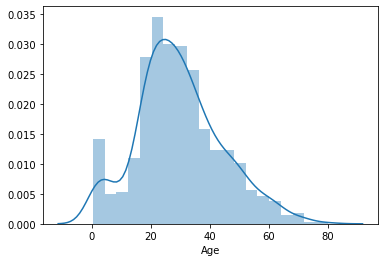

In [9]:
sns.distplot(df['Age'].fillna(np.median(df['Age'])))

<AxesSubplot:xlabel='Age'>

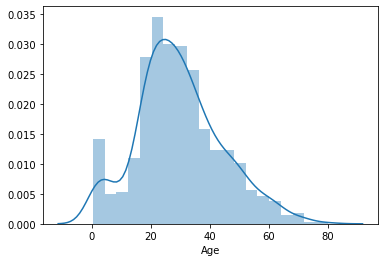

In [10]:
sns.distplot(df['Age'])

Text(0, 0.5, 'No. of Passenger')

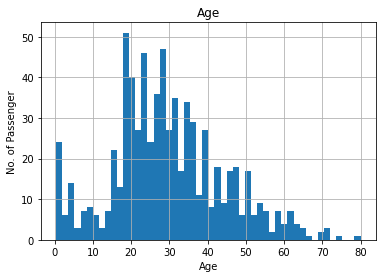

In [14]:
fig=df.Age.hist(bins=50)
fig.set_title('Age')
fig.set_xlabel('Age')
fig.set_ylabel('No. of Passenger')
#displaying Gaussian Distribution

Text(0.5, 1.0, 'Age Boxplot')

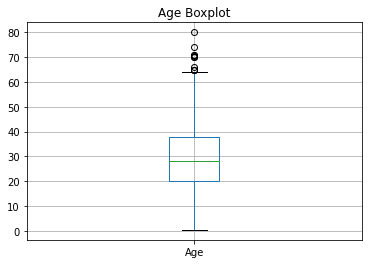

In [20]:
fig=df.boxplot(column='Age')
fig.set_title('Age Boxplot')#circle over 65 are outliers

In [21]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [27]:
upperbound=df['Age'].mean()+3*df['Age'].std()
lowerbound=df['Age'].mean()-3*df['Age'].std()

In [28]:
print(upperbound,lowerbound)

73.27860964406094 -13.880374349943303


# Interquantile Range

In [29]:
IQR=df.Age.quantile(.75)-df.Age.quantile(.25)

In [36]:
Lower_Bridge=df.Age.quantile(.25)-(IQR*1.5)

In [37]:
Upper_Bridge=df.Age.quantile(.75)+(IQR*1.5)

In [38]:
print(Lower_Bridge,Upper_Bridge)

-6.6875 64.8125


# if data column is right skewed

Text(0, 0.5, 'No. of Passenger')

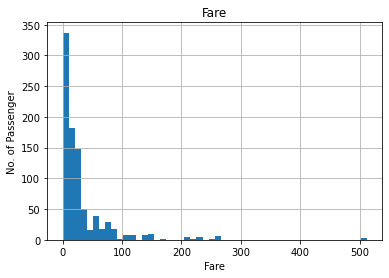

In [39]:
fig=df.Fare.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('No. of Passenger')
#displaying Gaussian Distribution

Text(0.5, 1.0, 'Fare Boxplot')

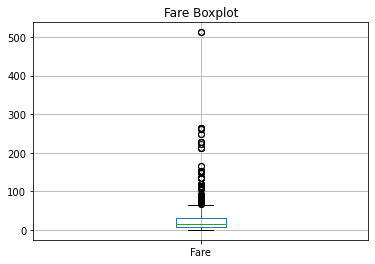

In [41]:
fig=df.boxplot(column='Fare')
fig.set_title('Fare Boxplot')#circle over 50 might be outliers

In [43]:
df.Fare.describe()#75% percentile and max value have larger difference

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [44]:
IQR=df.Fare.quantile(.75)-df.Fare.quantile(.25)
Lower_Bridge=df.Fare.quantile(.25)-IQR*1.5
Upper_Bridge=df.Fare.quantile(.75)+IQR*1.5
print(Lower_Bridge,Upper_Bridge)  #don't apply zscore in the case of skewed dataset

-26.724 65.6344


In [46]:
#in case of extreme outliers
IQR=df.Fare.quantile(.75)-df.Fare.quantile(.25)
Lower_Bridge=df.Fare.quantile(.25)-IQR*3
Upper_Bridge=df.Fare.quantile(.75)+IQR*3
print(Lower_Bridge,Upper_Bridge)  

-61.358399999999996 100.2688


In [45]:
# if the data is low in quantity then replace the values with normal values else drop the values

In [47]:
df.loc[df.Fare>=100,"Fare"]=100

Text(0, 0.5, 'No. of Passenger')

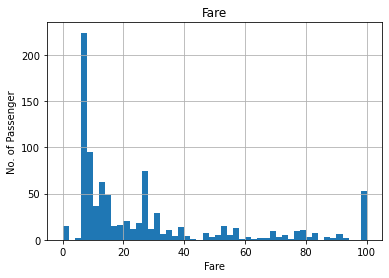

In [48]:
fig=df.Fare.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('No. of Passenger')
#displaying Gaussian Distribution